# 'Brighton, A Memorable City!' : Kaggle Competition. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier

In [2]:
test = pd.read_csv("testing.csv")
train = pd.read_csv("training.csv")
add_train = pd.read_csv("additional_training.csv")
confidence = pd.read_csv("annotation_confidence.csv")
proportions_data = pd.read_csv("test_proportions.csv", header=None)
sample_valid = pd.read_csv("sample_valid_submission.csv")

### Data cleaning

#### Concat train and additional train

In [3]:
# concat all training data and remove NaNs

all_train = pd.concat([train, add_train], ignore_index=True)

#### Fill Nan values 

In [4]:
all_train1 = all_train.drop(columns=['ID', 'prediction'])


m = all_train1.iloc[:,0:4096].mean(axis=1) # All CNN data
n = all_train1.iloc[:,4096:].mean(axis=1) # All GIST data

# Fill NaN values in CNN data
for i, list1 in enumerate(all_train.iloc[:,1:4097]):
    all_train.iloc[:,i+1] = all_train.iloc[:,i+1].fillna(m)
    
# Fill NaN values in GIST data    
for i, list1 in enumerate(all_train.iloc[:,4097:]):
    all_train.iloc[:,i+4097] = all_train.iloc[:,i+4097].fillna(n)
    
all_train

,ID,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,...,GIST.503,GIST.504,GIST.505,GIST.506,GIST.507,GIST.508,GIST.509,GIST.510,GIST.511,prediction
0,1,0.000000,0.000000,0.0,0.00000,0.440330,0.000000,0.277470,0.84990,0.00000,...,0.031213,0.035996,0.055542,0.027488,0.010136,0.028576,0.016819,0.013863,0.020987,1
1,2,0.000000,0.000000,0.0,0.00000,0.000000,1.848000,0.000000,0.00000,0.00000,...,0.007135,0.028133,0.014696,0.007583,0.006905,0.019008,0.022172,0.025843,0.020629,1
2,3,0.000000,0.000000,0.0,0.30395,0.000000,0.000000,0.119300,1.05840,0.51748,...,0.015431,0.014210,0.014325,0.022543,0.012947,0.018889,0.016838,0.018631,0.014774,1
3,4,0.211680,0.530310,0.0,0.00000,0.175600,0.000000,0.000000,0.35810,0.86264,...,0.007115,0.017257,0.008328,0.029539,0.006165,0.012097,0.022226,0.041484,0.016790,1
4,5,0.000000,0.000000,0.0,0.60434,0.000000,0.000000,0.008473,0.51557,0.00000,...,0.006654,0.005674,0.004851,0.010119,0.004460,0.009657,0.006265,0.006707,0.013045,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,2462,0.000000,0.175373,0.0,0.00000,0.000000,0.151080,0.175373,0.00000,0.00000,...,0.021819,0.032354,0.037327,0.032354,0.016833,0.025701,0.016527,0.018164,0.025477,1
2462,2463,0.000000,0.000000,0.0,0.29111,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.008685,0.019357,0.019357,0.037140,0.013628,0.019357,0.006510,0.018878,0.017722,0
2463,2464,0.043786,0.211851,0.0,0.37372,0.000000,0.000000,0.000000,0.94934,0.29822,...,0.026658,0.018363,0.007486,0.017105,0.011090,0.050463,0.018846,0.027723,0.018035,1
2464,2465,0.000000,1.051200,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.21347,...,0.018393,0.005131,0.020528,0.019866,0.033860,0.009691,0.031765,0.028936,0.042728,1


### Exploratory Analysis 

#### Use PCA to view data

In [5]:
X_train = all_train.drop(columns=['ID', 'prediction'])
y_train = all_train.prediction
X_test = test.drop(columns=['ID'])
    
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
   
pca = PCA(n_components = 2)
X_train_PCA = pca.fit_transform(X_train_scaled)
X_test_PCA = pca.transform(X_test_scaled)

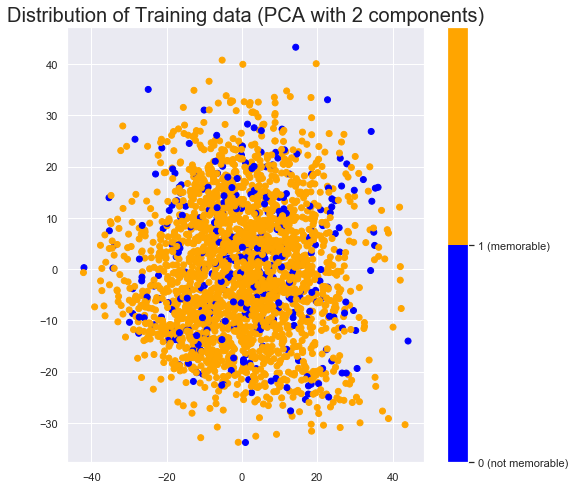

In [6]:
colours = ['blue', 'orange']
label = ['0 (not memorable)', '1 (memorable)']
fig = plt.figure(figsize=(8,8))
plt.scatter(X_train_PCA[:, 0], X_train_PCA[:, 1], c=y_train, cmap=matplotlib.colors.ListedColormap(colours))
plt.title('Distribution of Training data (PCA with 2 components)', fontsize=20)
cb = plt.colorbar()
loc = np.arange(0,max(y_train),max(y_train)/float(len(colours)))
cb.set_ticks(loc)
cb.set_ticklabels(label)

#### Visualise new classifier

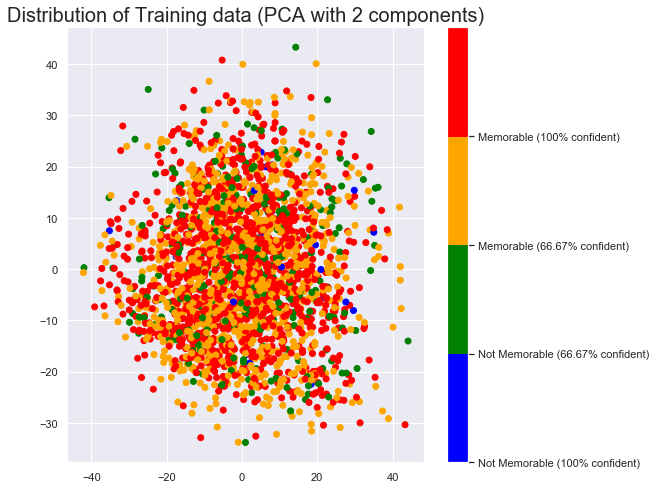

In [7]:
all_train['confidence'] = confidence['confidence']
all_train["combined"] = all_train[["confidence", "prediction"]].mean(axis = 1)
    
y_train = all_train.combined.replace(0.5, 0)
X_train = all_train.drop(columns=['ID', 'prediction', "confidence", "combined"])
X_test = test.drop(columns=['ID'])
    
le = preprocessing.LabelEncoder()
y_labeled = le.fit_transform(y_train)
    
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components = 2)
X_train_PCA = pca.fit_transform(X_train_scaled)
X_test_PCA = pca.transform(X_test_scaled)

colours = ['blue', 'green', 'orange', 'red']
label = ['Not Memorable (100% confident)', 'Not Memorable (66.67% confident)', 'Memorable (66.67% confident)', 'Memorable (100% confident)']
fig = plt.figure(figsize=(8,8))
plt.scatter(X_train_PCA[:, 0], X_train_PCA[:, 1], c=y_labeled, cmap=matplotlib.colors.ListedColormap(colours))
plt.title('Distribution of Training data (PCA with 2 components)', fontsize=20)
cb = plt.colorbar()
loc = np.arange(0,max(y_labeled),max(y_labeled)/float(len(colours)))
cb.set_ticks(loc)
cb.set_ticklabels(label)

#### Function to calculate proportions of 1's and 0's in predictions

In [18]:
def proportions(y_pred):
    
    ones = 0
    zeros = 0
    for num in y_pred['prediction']:
        if (num == 1):
            ones+=1
        else:
            zeros+=1
    ones = ones/len(y_pred['prediction'])
    zeros = zeros/len(y_pred['prediction'])
    
    print('Proportions: \n Ones: '+ str(ones)+'\n' + 'Zeros: ' + str(zeros))

#### Proportions of Test and Training data

In [19]:
print('Porportions of training data:\n ')
proportions(all_train)

print('\nPorportions of training data:\n ')
print('' ,proportions_data[0][0], '\n', proportions_data[0][1])

Porportions of training data:
 
Proportions: 
 Ones: 0.8678021086780211
Zeros: 0.1321978913219789

Porportions of training data:
 
 0.3848 class 1 
 0.6152 class 0


## Logistic regression

#### Model 1: Standardisation, PCA, Cross validation and Gridsearch on a Logistic regression

In [10]:
def PCA_CV_log(all_train, n_components, max_iter, cv, attempt):
    
    # create y train, X train, and X test
    y_train = all_train.prediction
    X_train = all_train.drop(columns=['ID', 'prediction'])
    X_test = test.drop(columns=['ID'])
    
    # Scale X train and X test using standard scaler on X train 
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
   
    # Reduce dimensionality of data using PCA
    pca = PCA(n_components = n_components)
    X_train_PCA = pca.fit_transform(X_train_scaled)
    X_test_PCA = pca.transform(X_test_scaled)
    
    # Logistic regression with grid search cross-validation 
    parameters = {'solver':('newton-cg', 'lbfgs', 'liblinear'), 'C':[0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]} # parameters used for grid search
    logreg = LogisticRegression(class_weight={0:12, 1:0.5, 2:0.1, 3:2}, max_iter=max_iter)
    clf = GridSearchCV(logreg, parameters, cv=cv, scoring='f1_weighted') # grid search cross validation with f1 weighted scoring 
    clf.fit(X_train_PCA, y_train) # fit to X train
    y_pred_PCA_gscv = clf.predict(X_test_PCA) # predict X test
    
    # Print results of Grid search cross-validation 
    print(clf.best_score_)
    print(clf.best_estimator_)
    print(clf.best_params_)
    
    # Save CSV of prediction
    y_pred_PCA_gscv = pd.DataFrame(data=y_pred_PCA_gscv, index = test.ID, columns=['prediction'])
    y_pred_PCA_gscv.to_csv('y_pred_log_f1_'+str(attempt)+'.csv')
    
    return y_pred_PCA_gscv

##### REMOVE HASTAGS BELOW TO RUN MODEL #####

# y_pred_log = PCA_CV_log(all_train, n_components = 50, max_iter = 3000, cv = 10, attempt = 2) 
# proportions(y_pred_log)

# Final Model

#### Model 2: Same as model 1, with the new combined classifier. 

In [23]:
def PCA_CV_log_con(all_train, n_components, max_iter, cv, attempt):
    
    # create new 'combined' classifier by taking mean of 'prediction' and 'confidence' columns. 
    all_train['confidence'] = confidence['confidence']
    all_train["combined"] = all_train[["confidence", "prediction"]].mean(axis = 1)
    
    # create y train, X train, and X test
    y_train = all_train.combined.replace(0.5, 0) # replace 0.5 with 0, so ordering is correct before label encoder 
    X_train = all_train.drop(columns=['ID', 'prediction', "confidence", "combined"])
    X_test = test.drop(columns=['ID'])
    
    # label encode y train to have integer labels in correct order. 
    le = preprocessing.LabelEncoder()
    y_labeled = le.fit_transform(y_train)
    
    # Scale X train and X test using standard scaler on X train 
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
   
    # Reduce dimensionality of data using PCA
    pca = PCA(n_components = n_components)
    X_train_PCA = pca.fit_transform(X_train_scaled)
    X_test_PCA = pca.transform(X_test_scaled)
    
    # print y train unique values before and after label encoder
    print('Combined column values: ', np.unique(y_train))
    print('label encoder values: ', np.unique(y_labeled))
    
    # Logistic regression with grid search cross-validation
    parameters = {'solver':('newton-cg', 'lbfgs', 'liblinear'), 'C':[0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 10]} # parameters used for grid search
    logreg = LogisticRegression(class_weight={0:12, 1:0.1, 2:0.1, 3:1.5}, max_iter=max_iter)  # lower weight on 2 worked better 
    clf = GridSearchCV(logreg, param_grid = parameters, cv=cv, scoring='f1_weighted') # grid search cross validation with f1 weighted scoring
    clf.fit(X_train_PCA, y_labeled) # fit to X train 
    y_pred_PCA_gscv = clf.predict(X_test_PCA) # predict X test
    
    # Inverse label encode and round numbers to convert combined values back to prediction values
    y_pred_PCA_gscv = le.inverse_transform(y_pred_PCA_gscv)
    y_pred_PCA_gscv = np.round(y_pred_PCA_gscv).astype(int)
    
    # Print results of Grid search cross-validation 
    print('Best accuracy score on training data: ', clf.best_score_)
    print('Paremeters chosen from grid search: ', clf.best_params_)
    
    # Save CSV of prediction
    y_pred_PCA_gscv = pd.DataFrame(data=y_pred_PCA_gscv, index = test.ID, columns=['prediction'])
    y_pred_PCA_gscv.to_csv('y_pred_log_con_'+str(attempt)+'.csv')
    
    return y_pred_PCA_gscv

y_pred_log_con = PCA_CV_log_con(all_train, n_components = 10, max_iter = 3000, cv = 10, attempt = 'FINAL2') 
proportions(y_pred_log_con)

Combined column values:  [0.   0.33 0.83 1.  ]
label encoder values:  [0 1 2 3]
Best accuracy score on training data:  0.3992723326677985
Paremeters chosen from grid search:  {'C': 0.0001, 'solver': 'liblinear'}
Proportions: 
 Ones: 0.36112514738083207
Zeros: 0.6388748526191679


#### Model 3: Same as model 2, with new scaling method used (seperasting CNN and GIST features before scaling)

In [12]:
def new_scale_log_con(all_train, n_components, max_iter, cv, attempt):
    
    # create new 'combined' classifier by taking mean of 'prediction' and 'confidence' columns. 
    all_train1 = all_train
    all_train1['confidence'] = confidence['confidence']
    all_train1["combined"] = all_train[["confidence", "prediction"]].mean(axis = 1)
    
    # create y train with label encoded combined values
    y_train = all_train1.combined.replace(0.5, 0)
    le = preprocessing.LabelEncoder()
    y_labeled = le.fit_transform(y_train)
    
    # seperate CNN  and GIST features
    X_train_cnn = all_train1.iloc[:,1:4097]
    X_train_gist = all_train1.iloc[:,4097:4609]
    X_test_cnn = test.iloc[:,1:4097]
    X_test_gist = test.iloc[:,4097:4609]

    # scale CNN features
    scaler_cnn = preprocessing.StandardScaler().fit(X_train_cnn)
    X_train_cnn_scaled = scaler_cnn.transform(X_train_cnn)
    X_test_cnn_scaled = scaler_cnn.transform(X_test_cnn)
    
    # scale GIST features
    scaler_gist = preprocessing.StandardScaler().fit(X_train_gist)
    X_train_gist_scaled = scaler_gist.transform(X_train_gist)
    X_test_gist_scaled = scaler_gist.transform(X_test_gist)  
    
    # re join X train and X test 
    X_train_scaled = np.concatenate((X_train_cnn_scaled, X_train_gist_scaled), axis=1)
    X_test_scaled = np.concatenate((X_test_cnn_scaled, X_test_gist_scaled), axis = 1)
    
    # Reduce dimensionality of data using PCA
    pca = PCA(n_components = n_components)
    X_train_PCA = pca.fit_transform(X_train_scaled)
    X_test_PCA = pca.transform(X_test_scaled)
    
    # print y train unique values before and after label encoder
    print('Combined column values: ', np.unique(y_train))
    print('label encoder values: ', np.unique(y_labeled))
    
    # Logistic regression with grid search cross-validation
    parameters = {'solver':('newton-cg', 'lbfgs', 'liblinear'), 'C':[0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 10]} # parameters used for grid search
    logreg = LogisticRegression(class_weight={0:12, 1:0.5, 2:0.1, 3:2}, max_iter=max_iter) 
    clf = GridSearchCV(logreg, param_grid = parameters, cv=cv, scoring='f1_weighted') # grid search using f1 weighted scoring
    clf.fit(X_train_PCA, y_labeled) # fit to x train
    y_pred_PCA_gscv = clf.predict(X_test_PCA) # predict X test
    
    # Inverse label encode and round numbers to convert combined values back to prediction values
    y_pred_PCA_gscv = le.inverse_transform(y_pred_PCA_gscv)
    y_pred_PCA_gscv = np.round(y_pred_PCA_gscv).astype(int)

    # Print results of Grid search cross-validation 
    print(clf.best_score_)
    print(clf.best_estimator_)
    print(clf.best_params_)
    
    # Save CSV of prediction 
    y_pred_PCA_gscv = pd.DataFrame(data=y_pred_PCA_gscv, index = test.ID, columns=['prediction'])
    y_pred_PCA_gscv.to_csv('y_pred_new_PCA_'+str(attempt)+'.csv')

    return y_pred_PCA_gscv

##### REMOVE HASTAGS BELOW TO RUN MODEL #####
# y_pred_new_PCA = new_PCA_log_con(all_train, n_components = 10, max_iter = 3000, cv = 10, attempt = 8) 
# proportions(y_pred_new_PCA)

# MLP 

#### Model 4: MLP with PCA and GSCV

In [13]:
def PCA_CV_MLP(X_train, X_test, y_train, n_components, max_iter, cv, attempt):
    
    # Scale X train and X test using standard scaler on X train 
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Reduce dimensionality of data using PCA
    pca = PCA(n_components = n_components)
    X_train_PCA = pca.fit_transform(X_train_scaled)
    X_test_PCA = pca.transform(X_test_scaled)
    
    # MLP classifier 
    mlp = MLPClassifier(max_iter=max_iter)
    
    # parameters used for grid search
    parameters = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)], 'activation': ['tanh', 'relu'], 
           'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant','adaptive'],}
    
    # grid search cross-validation
    clf = GridSearchCV(mlp, parameters, cv=cv)
    clf.fit(X_train_PCA, y_train) # fit on X train
    y_pred = clf.predict(X_test_PCA) # predicit on X test
    
    # print grid search results
    print(clf.best_score_)
    print(clf.best_estimator_)
    print(clf.best_params_)
    
    # save CSV of prediction 
    y_pred = pd.DataFrame(data=y_pred, index = test.ID, columns=['prediction'])
    y_pred.to_csv('y_pred_pca_mlp_'+str(attempt)+'.csv')
    
    return y_pred

##### REMOVE HASTAGS BELOW TO RUN MODEL #####
# y_pred_pca_mlp = PCA_CV_MLP(X_train, X_test, y_train, n_components=10, max_iter = 300, cv = 10, attempt = 2)
# proportions(y_pred_pca_mlp)

#### Model 5: same as model 4, with combined classifier.

In [14]:
def PCA_CV_MLP_CON(all_train, n_components, max_iter, cv, attempt):
    
    # create new 'combined' classifier by taking mean of 'prediction' and 'confidence' columns. 
    all_train['confidence'] = confidence['confidence']
    all_train["combined"] = all_train[["confidence", "prediction"]].mean(axis = 1)
    
    # create X train and X test 
    X_train = all_train.drop(columns=['ID', 'prediction', "confidence", "combined"])
    X_test = test.drop(columns=['ID'])
    
    # create y train with label encoded combined values
    y_train = all_train.combined.replace(0.5, 0)
    le = preprocessing.LabelEncoder()
    y_labeled = le.fit_transform(y_train)
    
    # Scale X train and X test using standard scaler on X train 
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Reduce dimensionality of data using PCA
    pca = PCA(n_components = n_components)
    X_train_PCA = pca.fit_transform(X_train_scaled)
    X_test_PCA = pca.transform(X_test_scaled)
    
    # MLP classifier 
    mlp = MLPClassifier(max_iter=max_iter)
    
    # parameters used for grid search
    parameters = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)], 'activation': ['tanh', 'relu'], 
           'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant','adaptive'],}
    
    # grid search cross validation 
    clf = GridSearchCV(mlp, parameters, cv=cv, scoring='f1_weighted')
    clf.fit(X_train_PCA, y_labeled) # fit on X train
    y_pred = clf.predict(X_test_PCA) # predicit on X test
    
    # Inverse label encode and round numbers to convert combined values back to prediction values
    y_pred = le.inverse_transform(y_pred)
    y_pred = np.round(y_pred_PCA_gscv).astype(int)
    
    # Print Results of grid search 
    print(clf.best_score_)
    print(clf.best_estimator_)
    print(clf.best_params_)
    
    y_pred = pd.DataFrame(data=y_pred, index = test.ID, columns=['prediction'])
    y_pred.to_csv('y_pred_mlp_con'+str(attempt)+'.csv')
    
    return y_pred

##### REMOVE HASTAGS BELOW TO RUN MODEL #####
# y_pred_mlp_con = PCA_CV_MLP_CON(all_train, n_components=10, max_iter = 300, cv = 10, attempt = 1)
# proportions(y_pred_mlp_con)a

# Results

#### Validation Curve (LR)

In [15]:
best_est = LogisticRegression(C=0.001, class_weight={0: 12, 1: 3, 2: 0.2, 3: 2},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=3000, multi_class='warn',
                   n_jobs=None, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

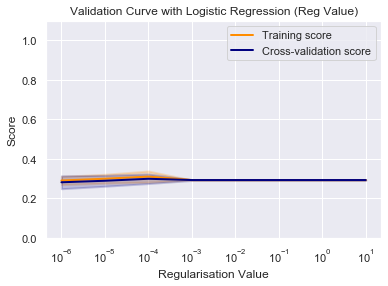

In [16]:
reg_vals = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 10]
train_scores, test_scores = validation_curve(best_est, X_train_PCA, y_labeled, param_name='C', param_range=reg_vals, cv=10, scoring='f1_weighted')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
param_range = reg_vals

plt.title("Validation Curve with Logistic Regression (Reg Value)")
plt.xlabel('Regularisation Value')
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

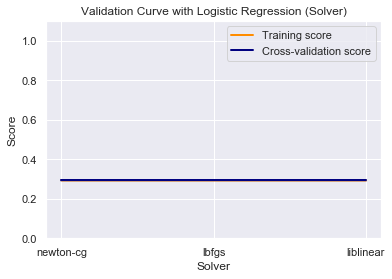

In [17]:
sol_vals = ['newton-cg', 'lbfgs', 'liblinear']
train_scores, test_scores = validation_curve(best_est, X_train_PCA, y_labeled, param_name='solver', param_range=sol_vals, cv=10, scoring='f1_weighted')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
param_range = sol_vals

plt.title("Validation Curve with Logistic Regression (Solver)")
plt.xlabel('Solver')
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()